# Akash Ugale

## CodeClause Internship 

### Project : Fake news Detection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn import metrics
import itertools

In [49]:
fk = pd.read_excel("G:/Projects/Codeclause internship/Fake news detection/fk.xlsx")
tr = pd.read_excel("G:/Projects/Codeclause internship/Fake news detection/tr.xlsx")
print(fk.shape)
print(tr.shape)

(23450, 4)
(21417, 4)


In [13]:
print(fk.head())
print(tr.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Yearâ...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamaâ€™s Na...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept t

In [14]:
fk['target'] = 'fake'
tr['target'] = 'true'
print(fk.head())
print(tr.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Yearâ...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamaâ€™s Na...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date target  
0  December 31, 2017   fake  
1  December 31, 2017   fake  
2  December 30, 2017   fake  
3  December 29, 2017   fake  
4  December 25, 2017   fake  
                                               title  \
0  As U.S. budget fight looms, Republicans

In [15]:
df = pd.concat([fk,tr]).reset_index(drop = True)
df.shape

(44867, 5)

In [16]:
from sklearn.utils import shuffle
df= shuffle(df)
df= df.reset_index(drop=True)
df.head()

,title,text,subject,date,target
0,CHECK OUT TINY CROWD At Hillary Rally In MUST ...,My kids draw bigger crowds at their neighborho...,left-news,"Sep 6, 2016",fake
1,WATCH: Rep. Ellison Predicts Rise Of Trump Al...,"This week, Senator Ted Cruz lost the Indiana p...",News,"May 7, 2016",fake
2,WATCH MSNBC LIBERAL HACKS Claim Conspiracy Bet...,Have these two been watching the news?The Russ...,Government News,"Apr 8, 2017",fake
3,Nobel laureate Vargas Llosa calls Trump a 'clo...,MADRID (Reuters) - Peruvian Nobel prize-winnin...,politicsNews,"March 1, 2016",true
4,"Trump, Macron discuss joint counterterrorism o...",WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"October 6, 2017",true


In [17]:
df.drop(["date"],axis=1,inplace=True)
df.drop(["title"],axis=1,inplace=True)
df["text"] = df["text"].str.lower()
df.head()

,text,subject,target
0,my kids draw bigger crowds at their neighborho...,left-news,fake
1,"this week, senator ted cruz lost the indiana p...",News,fake
2,have these two been watching the news?the russ...,Government News,fake
3,madrid (reuters) - peruvian nobel prize-winnin...,politicsNews,true
4,washington (reuters) - u.s. president donald t...,worldnews,true


In [19]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
df['text'] = df['text'].apply(remove_punctuation)


def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
df['text'] = df['text'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,subject,target
0,kids draw bigger crowds neighborhood lemonade ...,left-news,fake
1,week senator ted cruz lost indiana primary day...,News,fake
2,two watching newsthe russian president immedia...,Government News,fake
3,madrid reuters peruvian nobel prizewinning aut...,politicsNews,true
4,washington reuters us president donald trump s...,worldnews,true


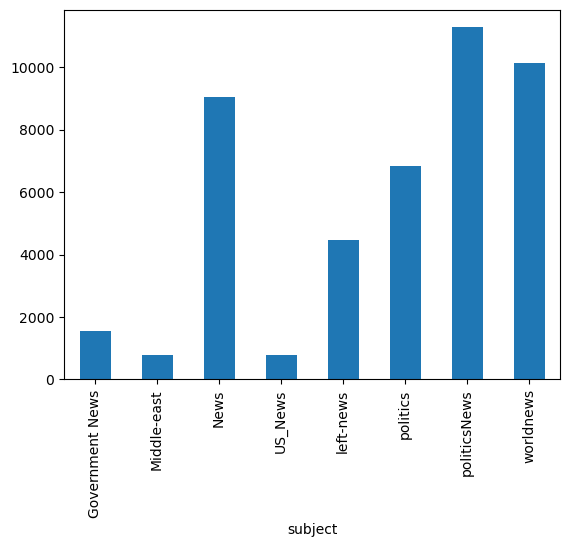

In [20]:
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

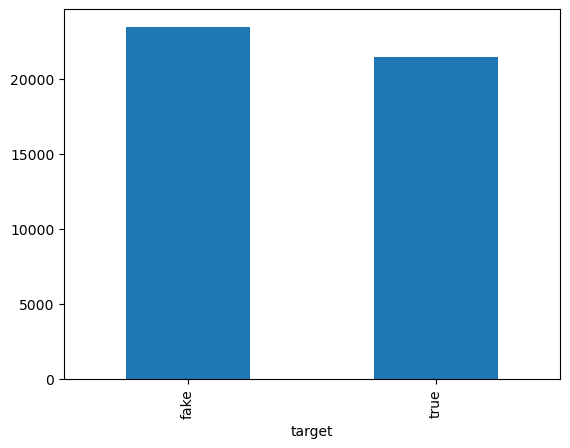

In [21]:
df.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [23]:
fake_data = df[df["target"] == "fake"]
all_words_f= ' '.join([text for text in fake_data.text])

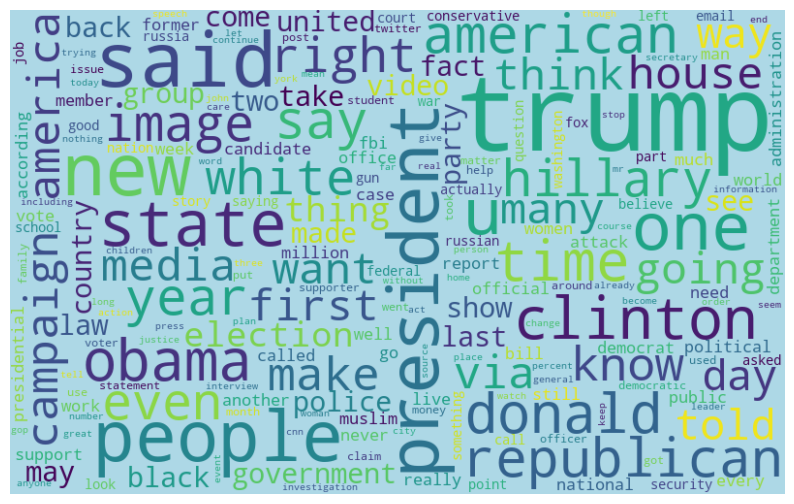

In [24]:
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          background_color='lightblue',
                          collocations =False).generate(all_words_f)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
true_data = df[df["target"] == "true"]
all_words_t = ' '.join([text for text in true_data.text])

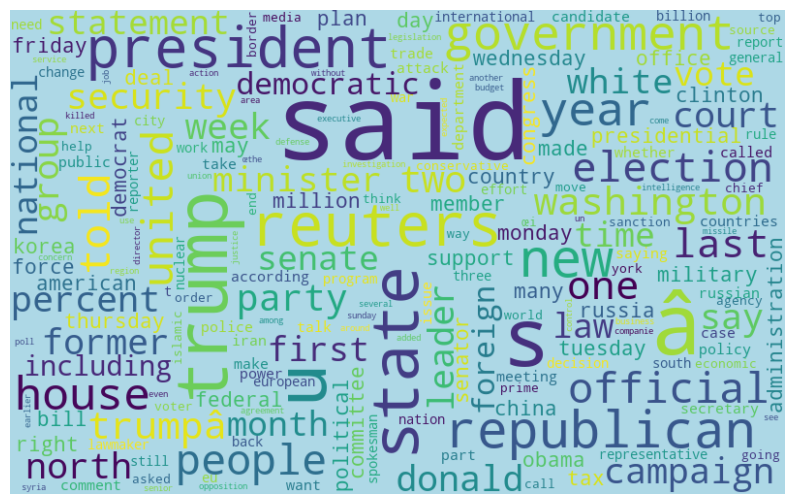

In [27]:
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          background_color='lightblue',
                          collocations =False).generate(all_words_t)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
import nltk
from nltk.probability import FreqDist
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
tokens_f= nltk.word_tokenize(all_words_f)
word_freq_f = FreqDist(tokens_f)
df_word_freq_f = pd.DataFrame(list(word_freq_f.items()), columns=['Word', 'Frequency'])
df_word_freq_f= df_word_freq_f.sort_values('Frequency', ascending=False)
df_word_freq_f.head(20)

,Word,Frequency
72,trump,73169
185,said,30873
245,people,25803
123,president,25341
591,would,23210
107,one,22509
349,us,21606
33,clinton,17724
256,obama,17707
209,like,17428


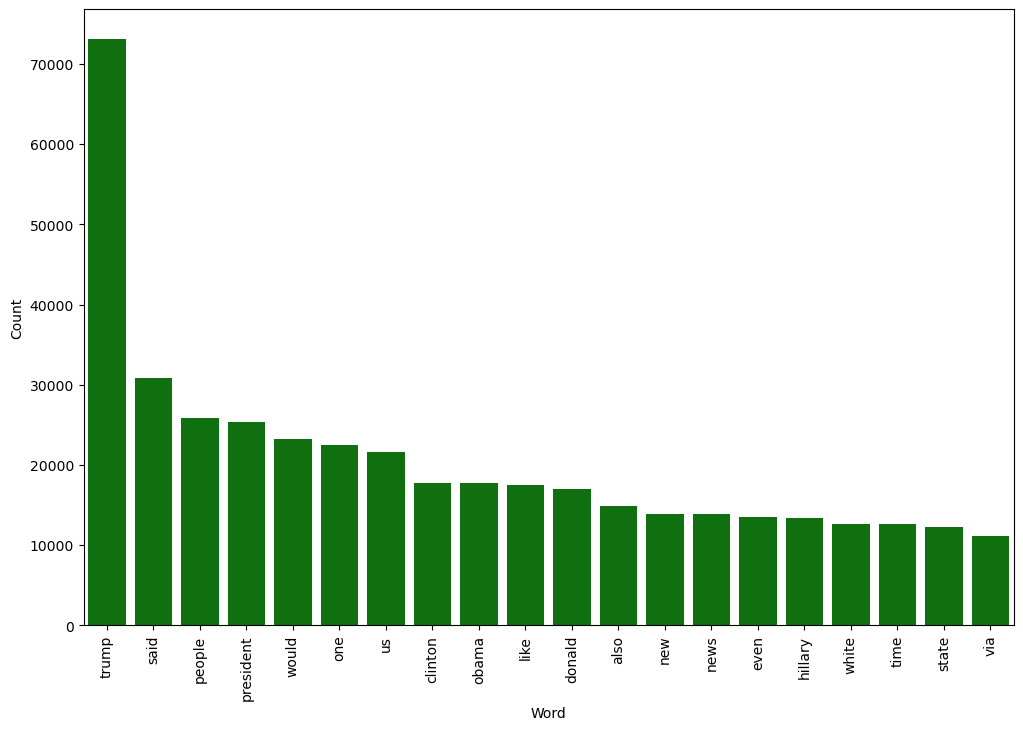

In [31]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_word_freq_f.head(20), x = "Word", y = "Frequency", color = 'green')
ax.set(ylabel = "Count")
plt.xticks(rotation='vertical')
plt.show()

In [32]:
tokens_t = nltk.word_tokenize(all_words_t)
word_freq_t = FreqDist(tokens_t)
df_word_freq_t = pd.DataFrame(list(word_freq_t.items()), columns=['Word', 'Frequency'])
df_word_freq_t = df_word_freq_t.sort_values('Frequency', ascending=False)
df_word_freq_t.head(20)

,Word,Frequency
9,said,98951
12,trump,42047
23,us,40844
15,would,31416
1,reuters,28295
138,president,25203
337,state,18544
563,government,17849
51,new,16712
40,house,16291


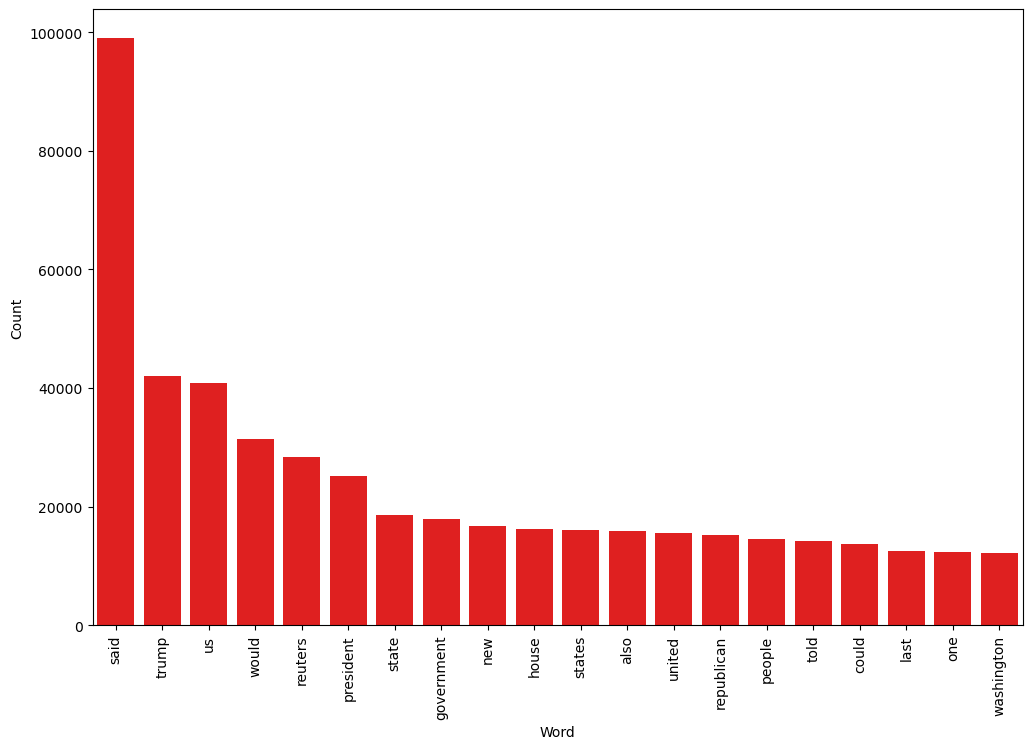

In [33]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_word_freq_t.head(20), x = "Word", y = "Frequency", color = 'red')
ax.set(ylabel = "Count")
plt.xticks(rotation='vertical')
plt.show()

In [34]:
X_train,X_test,y_train,y_test = train_test_split(df['text'], df.target, test_size=0.2, random_state=42)

In [35]:
X_train

1550     justice department thursday dropped legal chal...
1888     ankara reuters iran supreme leader ayatollah a...
16985    videos shock think sweden think muslim gangs r...
34557    sunday house speaker paul ryan stated feels mu...
20305    warsaw reuters poland said monday legislative ...
                               ...                        
11284                                                     
44732    first impaneled grand jury grand jury began is...
38158    sarah huckabee sanders taken control media lon...
860      washington reuters top democrat us house repre...
15795    new york reuters passage longanticipated us ta...
Name: text, Length: 35893, dtype: object

In [36]:
X_test

39023    president barack obama singlehandedly caused c...
10986    despite fact many election experts hoping 2016...
23500    reuters us president donald trump tuesday stoo...
3563     politics nasty business latest spat proves pol...
22500    washington reuters us representative jason cha...
                               ...                        
16613    republicans seem steadfast quest destroy affor...
33       edinburgh reuters scotland devolved government...
31365    reuters us senator dick durbin 2 democrat sena...
5233     jakartaislamabadcairo reuters many muslims aro...
20336    huma abedin hillary right hand woman told test...
Name: text, Length: 8974, dtype: object

In [37]:
y_train

1550     fake
1888     true
16985    fake
34557    fake
20305    true
         ... 
11284    fake
44732    fake
38158    fake
860      true
15795    true
Name: target, Length: 35893, dtype: object

In [38]:
y_test

39023    fake
10986    fake
23500    true
3563     fake
22500    true
         ... 
16613    fake
33       true
31365    true
5233     true
20336    fake
Name: target, Length: 8974, dtype: object

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [40]:
# NAIVE BAYES

classifier = MultinomialNB()
classifier.fit(X_train_vectorized ,y_train_encoded)
pred_MNB = classifier.predict(X_test_vectorized)
accuracy = accuracy_score(y_test_encoded,pred_MNB)
print("accuracy: {}%".format(round(accuracy*100,2)))

accuracy: 96.14%


Confusion Matrix MNB:


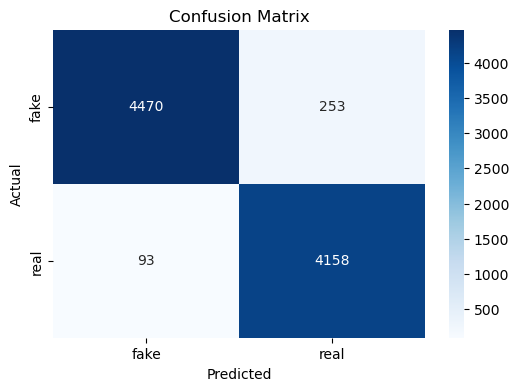

In [41]:
confusion_mat = confusion_matrix(y_test_encoded,pred_MNB)
print("Confusion Matrix MNB:")
class_labels = ['fake', 'real']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
# LOGISTIC REGRESSION 

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vectorized ,y_train_encoded)
pred_LOGR = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test_encoded,pred_LOGR)
print("accuracy: {}%".format(round(accuracy*100,2)))

accuracy: 99.04%


Confusion Matrix LOGR:


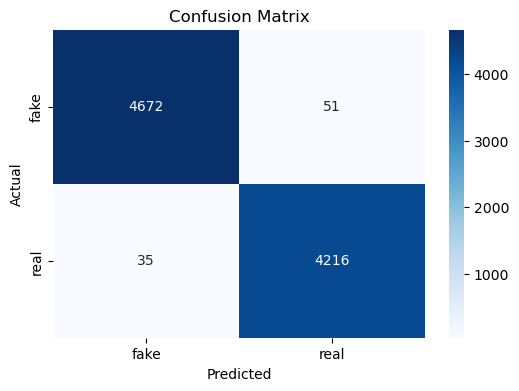

In [43]:
confusion_mat = confusion_matrix(y_test_encoded,pred_LOGR)
print("Confusion Matrix LOGR:")
class_labels = ['fake', 'real']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [44]:
# DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train_vectorized ,y_train_encoded)
pred_DTC = clf.predict(X_test_vectorized)
accuracy = accuracy_score(y_test_encoded,pred_DTC)
print("accuracy: {}%".format(round(accuracy*100,2)))

accuracy: 99.6%


Confusion Matrix DTC:


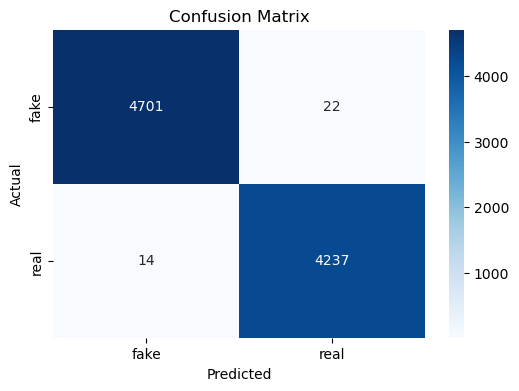

In [45]:
confusion_mat = confusion_matrix(y_test_encoded,pred_DTC)
print("Confusion Matrix DTC:")
class_labels = ['fake', 'real']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [46]:
# RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=42)
RFC.fit(X_train_vectorized ,y_train_encoded)
pred_RFC = RFC.predict(X_test_vectorized)
accuracy = accuracy_score(y_test_encoded,pred_RFC)
print("accuracy: {}%".format(round(accuracy*100,2)))

accuracy: 99.35%


Confusion Matrix RFC:


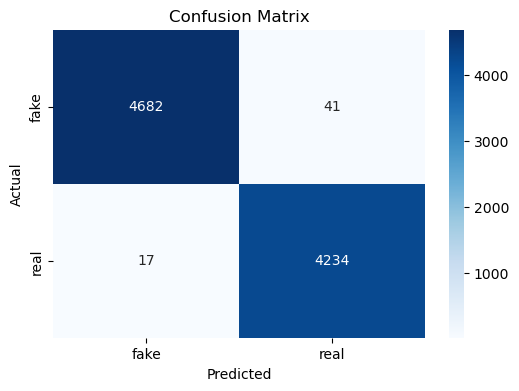

In [47]:
confusion_mat = confusion_matrix(y_test_encoded,pred_RFC)
print("Confusion Matrix RFC:")
class_labels = ['fake', 'real']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
# SVM(SUPPORT VECTOR MACHINE)

In [50]:
from sklearn.svm import SVC

svmc = SVC(kernel='linear')
svmc.fit(X_train_vectorized ,y_train_encoded)
pred_svmc = svmc.predict(X_test_vectorized)
accuracy = accuracy_score(y_test_encoded,pred_svmc)
print("accuracy: {}%".format(round(accuracy*100,2)))

accuracy: 99.65%


Confusion Matrix svmc:


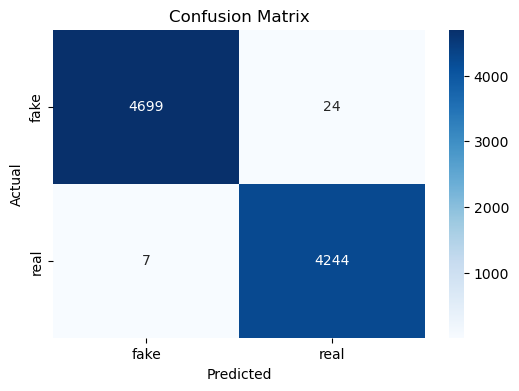

In [51]:
confusion_mat = confusion_matrix(y_test_encoded,pred_svmc)
print("Confusion Matrix svmc:")
class_labels = ['fake', 'real']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

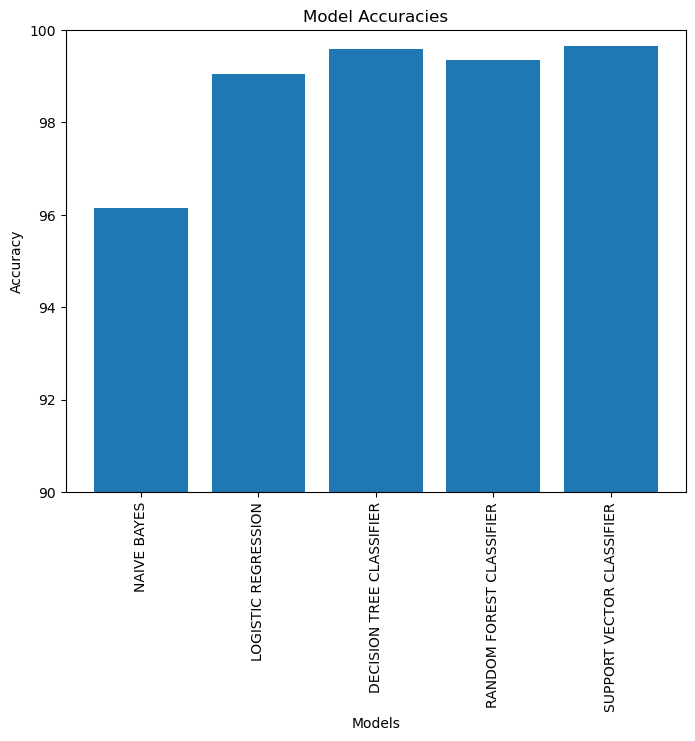

In [52]:
accuracies = [96.14,99.04,99.60,99.35,99.65 ]
models = ['NAIVE BAYES','LOGISTIC REGRESSION','DECISION TREE CLASSIFIER','RANDOM FOREST CLASSIFIER','SUPPORT VECTOR CLASSIFIER']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(90,100)
plt.xticks(rotation='vertical')
plt.show()